## Dados

Neste trabalho usam-se 3 datasets:
-Paises;
-Consumo de café;
-Felicidade;

A ideia é trabalhar estes dados, usando datasets. Pretendo demonstrar muito do que foi aprendido nas aulas, fazer algumas análises explicativas do trabalho que foi sendo desenvolvido nesses datasets e por fim ter um dashboard onde se finaliza também com algumas demonstrações do que foi aprendido nas aulas.



## Primeiro tratamento de dados

Aqui carregam-se os dois primeiros datasets. O de Paises e depois o de coffee. O de Coffee não é o inicialmente proposto já que esse se revelou mau.
Este também é limitado (tem a UE agrupada o que impede a analise de paises como o nosso) mas é muito mais assertivo.
<br> Em ambos, verificam-se por valores vazios e apresenta-se no ecrã.
<br> No caso de paises, várias colunas apresentavam valores vazios. Estas células foram substituidas pelo valor zero.

<div class="alert alert-block alert-info">
<p>ℹ️<b>Nota 1</b></p>
   <p>
depois de análise exaustiva, cheguei à conclusão que, com este dataset, não se conseguia aferir, propriamente, as conclusões a que nos tinhamos proposto (ligar ou não o consumo de café a felicidade), por isso, continuo a assumir que os marcadores escolhidos, são os ideiais para este tipo de análise.
</p>
</div>

In [492]:
import pandas as pd

# Load the dataset into a DataFrame
dfCountries = pd.read_csv('Dados/countries of the world.csv')

# Display the first few rows of the DataFrame
dfCountries.head()

dfCoffee = pd.read_csv('Dados/psd_coffee.csv')

# Check for missing values in each column
missing_valuesCountries = dfCountries.isna().sum()
missing_valuesCoffee = dfCoffee.isna().sum()
print(f'Missing values in each column Countries:\n {missing_valuesCountries}\n and Cofeee:\n{missing_valuesCoffee}')
dfCountries = dfCountries.fillna(0)
# Check AGAIN for missing values in each column
missing_valuesCountries = dfCountries.isna().sum()
missing_valuesCoffee = dfCoffee.isna().sum()
# print(f'Missing values in each column Countries:\n {missing_valuesCountries}\n and Cofeee:\n{missing_valuesCoffee}')
# use a pivot table to display the average coffee production for each country and in the columns show the Attribute_Description Column
dfCoffee.pivot_table(index='Country_Name', columns='Attribute_Description', values='Value', aggfunc='mean')


Missing values in each column Countries:
 Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64
 and Cofeee:
Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Mark

Attribute_Description,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
Country_Name,,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.000000,2067.105263,0.000000,2094.736842,0.000000,0.000000,2094.736842,0.000000,0.000000,0.000000,0.000000,0.000000,2067.631579,27.105263,0.000000,27.631579,2094.736842,2094.736842
Angola,21.475410,879.098361,0.000000,1287.737705,47.901639,1274.344262,879.098361,0.000000,0.000000,913.606557,0.000000,0.000000,892.131148,47.901639,0.000000,0.000000,0.000000,2201.344262,2201.344262
Argentina,0.000000,0.000000,491.315789,0.000000,730.315789,0.000000,0.000000,730.315789,0.000000,0.000000,0.000000,11.105263,0.000000,501.368421,228.947368,0.000000,227.894737,730.315789,730.315789
Australia,0.000000,0.000000,1146.842105,0.000000,1505.000000,0.000000,0.000000,1505.000000,0.000000,0.000000,0.000000,119.210526,0.000000,1266.052632,238.947368,0.000000,238.947368,1505.000000,1505.000000
Benin,0.000000,16.720000,0.000000,0.880000,0.660000,0.880000,16.720000,0.000000,0.000000,17.380000,0.000000,0.000000,17.380000,0.660000,0.000000,0.000000,0.000000,18.260000,18.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,240.344262,7561.311475,82.147541,600.704918,605.442623,681.573770,7915.278689,143.655738,4.819672,8457.934426,71.426230,31.262295,8212.770492,539.426230,66.016393,282.540984,30.245902,9202.295082,9202.295082
Yemen,133.533333,32.200000,0.000000,0.000000,98.333333,0.000000,35.200000,0.000000,0.000000,133.533333,3.000000,0.000000,0.000000,98.333333,0.000000,0.000000,0.000000,133.533333,133.533333
Yemen (Sanaa),61.645161,51.096774,0.000000,0.000000,10.000000,0.000000,51.645161,0.000000,0.000000,61.645161,0.548387,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,61.645161,61.645161


Através de pivot table, conseguimos facilmente ver o conteúdo da coluna Attribute Description e os valores que ela tem ficam agrupados por média.Assim, conseguimos ver que o que nos vai interessar são apenas as linhas onde o atributo é igual a  "Domestic Cosumption."

--> Mais tarde notamos que afinal este consumo interno não é exatamente o que procuramos pois engloba todo o café. Assim, decidi usar um outro indicador, baseado no atributo "Soluble Dom. Cons". Depois de analisado, verificou-se que este indicador estava muito fraco em termos de dados e foi por isso descartado.

Agora continuamos e agrupamos de uma forma clássica, muda-se o nome da coluna e guarda-se num csv

In [493]:


dfCoffee_grouped = dfCoffee[dfCoffee['Attribute_Description'] == 'Domestic Consumption'].groupby('Country_Name').sum()
dfCoffee_avg = dfCoffee.groupby(['Country_Name', 'Attribute_Description'])['Value'].mean().reset_index()

dfCoffee_filtered = dfCoffee_avg[dfCoffee_avg['Attribute_Description'] == 'Domestic Consumption']

#Change the column named Value to Coffee Domestic Consumption
dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)
dfCoffee_filtered.to_csv('DadosTratados/CoffeeTreated.csv', index=False)


/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_3556/3851720873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered.rename(columns={'Value': 'Coffee Domestic Consumption'}, inplace=True)


## Juntar os dois

Faz-se algum tratamento e depois juntam-se os dataframes.
Dentro desse tratamento, o que se faz é mudar o nome da coluna Country para Country_Name para facilitar comparações, filtrar por Pais, retirar espaçis e baixar para minusculas.

In [494]:

# Rename the 'Country' column in dfCountries to 'Country_Name'
dfCountries.rename(columns={'Country': 'Country_Name'}, inplace=True)

# Ensure consistent formatting for merging
dfCountries['Country_Name'] = dfCountries['Country_Name'].str.strip().str.lower()
dfCoffee_filtered['Country_Name'] = dfCoffee_filtered['Country_Name'].str.strip().str.lower()

# Merge the two DataFrames
dfMerged = pd.merge(dfCountries, dfCoffee_filtered, how='inner', on='Country_Name')

# Display the first few rows of the merged DataFrame
dfMerged.head()
dfMerged.to_csv('DadosTratados/Merged.csv', index=False)


/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_3556/3862187834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered['Country_Name'] = dfCoffee_filtered['Country_Name'].str.strip().str.lower()


## Carregar a felicidade

Carrega-se o dataset de felicidade, trata-se e juntam-se todos os dados.
Renomei-se novamente a coluna "Country (region)" para Country_Name. Garante-se que a formatação está regularizada (tirar espaços e tudo em minusculas). Juntam-se os datasets e elimina-se a coluna Attribute_Description que deixa de fazer sentido pois já está agrupada.

### Carregar todos os anos e analisar

Carregam-se todos os anos e adiciona-se a coluna de ano a cada um deles.

In [495]:
dfH2015 = pd.read_csv('Dados/worldhappinessreport/2015.csv')
dfH2015['Year'] = 2015
dfH2016 = pd.read_csv('Dados/worldhappinessreport/2016.csv')
dfH2016['Year'] = 2016
dfH2017 = pd.read_csv('Dados/worldhappinessreport/2017.csv')
dfH2017['Year'] = 2017
dfH2018 = pd.read_csv('Dados/worldhappinessreport/2018.csv')
dfH2018['Year'] = 2018
dfH2019 = pd.read_csv('Dados/worldhappinessreport/2019.csv')
dfH2019['Year'] = 2019


#### Nestes datasets verifica-se que:
2015 e 2016 têm um formato
2017 tem um formato e dados bastante distintos
2018 e 2019 têm outro formato.

Assim procedo a limpar todos os dados e guardar apenas o que pretendo:
Pais, Rank, GDP per Capita,

#### 2015

In [496]:
# only need a few columns named Country, Region, Happiness Rank and GDP per Capita
dfH2015 = dfH2015[['Year','Country', 'Region', 'Happiness Rank','Happiness Score','Economy (GDP per Capita)']]
dfH2015.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
0,2015,Switzerland,Western Europe,1,7.587,1.39651
1,2015,Iceland,Western Europe,2,7.561,1.30232
2,2015,Denmark,Western Europe,3,7.527,1.32548
3,2015,Norway,Western Europe,4,7.522,1.45900
4,2015,Canada,North America,5,7.427,1.32629


#### 2016


In [497]:
# only need a few columns named Country, Region, Happiness Rank and GDP per Capita
dfH2016 = dfH2016[['Year','Country', 'Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)']]
dfH2016.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
0,2016,Denmark,Western Europe,1,7.526,1.44178
1,2016,Switzerland,Western Europe,2,7.509,1.52733
2,2016,Iceland,Western Europe,3,7.501,1.42666
3,2016,Norway,Western Europe,4,7.498,1.57744
4,2016,Finland,Western Europe,5,7.413,1.40598


#### 2017
Este é o mais problemático pois tem campos com nomes diferentes e falta region.

Assim, alteramos o nome das colunas e vamos buscar a região aos datasets anteriores!

In [498]:
# only need a few columns named Country, Region, Happiness Rank and GDP per Capita
dfH2017 = dfH2017[['Year','Country', 'Happiness.Rank','Happiness.Score' ,'Economy..GDP.per.Capita.']]
# rename the columns to match the 2015 and 2016 dataframes
dfH2017.rename(columns={'Happiness.Rank': 'Happiness Rank','Happiness.Score':'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)'}, inplace=True)
# add a column named region after Country to the 2017 dataframe and get the region from the 2015 dataframe based ont the Country
dfH2017['Region'] = dfH2017['Country'].map(dfH2015.set_index('Country')['Region'])
# region column must come after country
dfH2017 = dfH2017[['Year','Country', 'Region', 'Happiness Rank','Happiness Score', 'Economy (GDP per Capita)']]
dfH2017.tail()


,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)
150,2017,Rwanda,Sub-Saharan Africa,151,3.471,0.368746
151,2017,Syria,Middle East and Northern Africa,152,3.462,0.777153
152,2017,Tanzania,Sub-Saharan Africa,153,3.349,0.511136
153,2017,Burundi,Sub-Saharan Africa,154,2.905,0.091623
154,2017,Central African Republic,Sub-Saharan Africa,155,2.693,0.000000


#### 2018

In [499]:
dfH2018 = dfH2018[['Year','Country or region', 'Overall rank','Score', 'GDP per capita']]
# rename the columns to match the 2015 and 2016 dataframes
dfH2018.rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank','Score':'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
# add a column named region after Country to the 2017 dataframe and get the region from the 2015 dataframe based ont the Country
dfH2018['Region'] = dfH2018['Country'].map(dfH2015.set_index('Country')['Region'])
dfH2018.tail()

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Region
151,2018,Yemen,152,3.355,0.442,Middle East and Northern Africa
152,2018,Tanzania,153,3.303,0.455,Sub-Saharan Africa
153,2018,South Sudan,154,3.254,0.337,NaN
154,2018,Central African Republic,155,3.083,0.024,Sub-Saharan Africa
155,2018,Burundi,156,2.905,0.091,Sub-Saharan Africa


#### 2019

In [500]:
dfH2019 = dfH2019[['Year','Country or region', 'Overall rank','Score', 'GDP per capita']]
# rename the columns to match the 2015 and 2016 dataframes
dfH2019.rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank','Score':'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
# add a column named region after Country to the 2017 dataframe and get the region from the 2015 dataframe based ont the Country
dfH2019['Region'] = dfH2019['Country'].map(dfH2015.set_index('Country')['Region'])
dfH2019.tail()


,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Region
151,2019,Rwanda,152,3.334,0.359,Sub-Saharan Africa
152,2019,Tanzania,153,3.231,0.476,Sub-Saharan Africa
153,2019,Afghanistan,154,3.203,0.350,Southern Asia
154,2019,Central African Republic,155,3.083,0.026,Sub-Saharan Africa
155,2019,South Sudan,156,2.853,0.306,NaN


#### Por fim, concatena-se tudo

In [501]:
dfHAll = pd.concat([dfH2015, dfH2016, dfH2017, dfH2018, dfH2019], ignore_index=True)
dfHAll.to_csv('DadosTratados/WorldHappinessReportALL.csv', index=False)


#### Verifica-se

In [502]:
missing_regions = dfHAll[dfHAll['Region'].isna()]
print(missing_regions)

     Year                   Country Region  Happiness Rank  Happiness Score  \
347  2017  Taiwan Province of China    NaN              33            6.422   
364  2017                    Belize    NaN              50            5.956   
385  2017   Hong Kong S.A.R., China    NaN              71            5.472   
407  2017                   Somalia    NaN              93            5.151   
425  2017                   Namibia    NaN             111            4.574   
461  2017               South Sudan    NaN             147            3.591   
507  2018         Trinidad & Tobago    NaN              38            6.192   
518  2018                    Belize    NaN              49            5.956   
527  2018           Northern Cyprus    NaN              58            5.835   
567  2018                   Somalia    NaN              98            4.982   
588  2018                   Namibia    NaN             119            4.441   
623  2018               South Sudan    NaN          

#### Nota-se que faltam algumas regiões e que o dataset é chinês ao declarar Taiwan como uma provicia Chinesa.

O que vou fazer:
- Mudar o nome de Taiwan
- Eliminar Hong Kong
- Acertar o nome de trinindad and tobago
- Acertar o nome de Chipre
- Acerter o nome de Macedónia
- Adicionar regiões aos Paises em falta (Gambia, Namibia, South Sudan e Belize)

In [503]:
# In the Column country where country is Taiwan + something, replace it with just taiwan
dfHAll['Country'] = dfHAll['Country'].str.replace('Taiwan Province of China', 'Taiwan')
# Delete all lines that include a Country named Hong Kong or similar
dfHAll = dfHAll[~dfHAll['Country'].str.contains('Hong Kong')]
# Set the region of namibia to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'Namibia', 'Region'] = 'Sub-Saharan Africa'

# Replace Trinidad and Tobago with Trinidad & Tobago
dfHAll['Country'] = dfHAll['Country'].str.replace('Trinidad & Tobago', 'Trinidad and Tobago')
# Replace North Cyprus with Cyprus
dfHAll['Country'] = dfHAll['Country'].str.replace('Northern Cyprus', 'North Cyprus')
# Replace North Macedonia with Macedonia
dfHAll['Country'] = dfHAll['Country'].str.replace('North Macedonia', 'Macedonia')
dfHAll['Country'] = dfHAll['Country'].str.replace('Somalia', 'Somaliland region')
# Set the region of Gambia to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'Gambia', 'Region'] = 'Sub-Saharan Africa'
# Set the region of Namibia to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'Namibia', 'Region'] = 'Sub-Saharan Africa'
# Set South Sudan to Sub-Saharan Africa
dfHAll.loc[dfHAll['Country'] == 'South Sudan', 'Region'] = 'Sub-Saharan Africa'
# Set Belize to Latin America and Caribbean
dfHAll.loc[dfHAll['Country'] == 'Belize', 'Region'] = 'Latin America and Caribbean'
missing_regions = dfHAll[dfHAll['Region'].isna()]
print(missing_regions)

     Year              Country Region  Happiness Rank  Happiness Score  \
347  2017               Taiwan    NaN              33            6.422   
407  2017    Somaliland region    NaN              93            5.151   
507  2018  Trinidad and Tobago    NaN              38            6.192   
527  2018         North Cyprus    NaN              58            5.835   
567  2018    Somaliland region    NaN              98            4.982   
664  2019  Trinidad and Tobago    NaN              39            6.192   
689  2019         North Cyprus    NaN              64            5.718   
709  2019            Macedonia    NaN              84            5.274   
737  2019    Somaliland region    NaN             112            4.668   

     Economy (GDP per Capita)  
347                  1.433627  
407                  0.022643  
507                  1.223000  
527                  1.229000  
567                  0.000000  
664                  1.231000  
689                  1.263000  
709

#### Refazer a procura por vazios

In [504]:
#Set the rgion of dfHall to the region of dfH2015 based on the country IF it exists if not, replace it with the region of the country in dfH2015
dfHAll['Region'] = dfHAll['Country'].map(dfH2015.set_index('Country')['Region']).fillna(dfHAll['Region'])

missing_regions = dfHAll[dfHAll['Region'].isna()]
print(missing_regions)

Empty DataFrame
Columns: [Year, Country, Region, Happiness Rank, Happiness Score, Economy (GDP per Capita)]
Index: []


### Mostrar a evolução da felicidade ao long dos anos

/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nunovivas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with 

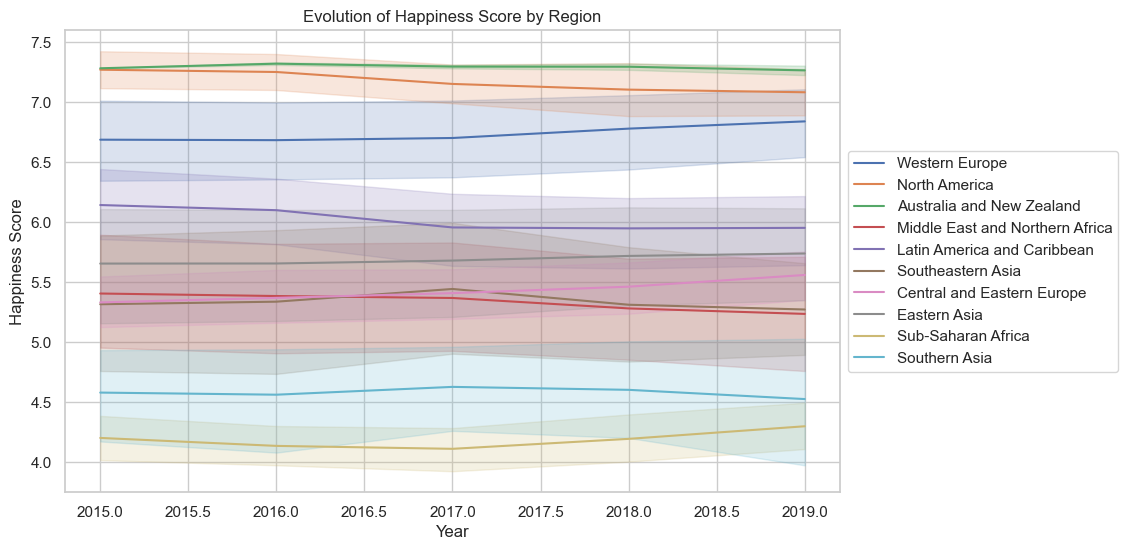

In [522]:
# Show a line graph with the evolution of happiness per region over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=dfHAll, x='Year', y='Happiness Score', hue='Region')
plt.title('Evolution of Happiness Score by Region')
# Show the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Carregar apenas 2019 para dataset final

In [506]:
dfHappiness = pd.read_csv('Dados/worldhappinessreport/2019.csv')
#Rename the column named 'Country (region)' to 'Country_Name'
dfHappiness.rename(columns={'Country or region': 'Country_Name'}, inplace=True)
#Ensure consistent formatting for merging
dfHappiness['Country_Name'] = dfHappiness['Country_Name'].str.strip().str.lower()
#Merge the happiness dataset with the merged dataset
dfMergedHappiness = pd.merge(dfMerged, dfHappiness, how='inner', on='Country_Name')
#Remove the column named "Atribute_Description"
dfMergedHappiness.drop(columns='Attribute_Description', inplace=True)
dfMergedHappiness['Region'] = dfMergedHappiness['Region'].str.strip().str.lower()

#Show the first few rows of the merged dataset
dfMergedHappiness.head()



,Country_Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Service,Coffee Domestic Consumption,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,algeria,northern africa,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"0,298",2094.736842,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
1,argentina,latin amer. & carib,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,"0,547",730.315789,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
2,australia,oceania,20264082,7686850,"2,6","0,34","3,98","4,69",29000.0,"100,0",...,"0,7",1505.000000,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290
3,benin,sub-saharan africa,7862944,112620,"69,8","0,11",0,85,1100.0,"40,9",...,"0,546",0.660000,102,4.883,0.393,0.437,0.397,0.349,0.175,0.082
4,bolivia,latin amer. & carib,8989046,1098580,"8,2","0,00","-1,32","53,11",2400.0,"87,2",...,"0,52",42.770492,61,5.779,0.776,1.209,0.706,0.511,0.137,0.064


Verifica-se novamente todo o dataset para garantir que já não existem valores vazios.

In [507]:
# Check for missing values in each column
missing_valuesHapiness = dfMergedHappiness.isna().sum()
print(f'Missing values in each column Hapinesss:\n {missing_valuesHapiness}\n')


Missing values in each column Hapinesss:
 Country_Name                          0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
Coffee Domestic Consumption           0
Overall rank                          0
Score                                 0
GDP per capita                        

## Grava-se num ficheiro para poder usar nos dashboards
Durante este trabalho as várias partes importantes são gravadas em ficheiro. Primeiro para poder usar ferramentas como o excel para pesquisa de dados (pois posso estar a aplicar algum filtro mal) e segundo para ficar com um histórico do que foi feito e assim com memória futura.

In [508]:
# Save the merged dataset to a CSV file
dfMergedHappiness.to_csv('DadosTratados/dfDashboards.csv', index=False)

# Usar Transformações

Aqui, dou-lhes um uso expecifico para mostrar os 5 regiões mais felizes e menos felizes. Faço uso de agrupação Por (região e Score) e calculo a média. Depois mudo o nome da coluna resultando, substituindo-a, para que reflita mais precisamente o resultado calculado. Por fim ordena-se por ordem descendente para que se veja em primeiro lugar aquele que tem melhor resultado.

### Os 5 mais felizes

In [509]:
# Use a transformation to create a new DataFrame that contains the average happiness score for each region
dfindexRegionHappiness = dfMergedHappiness.groupby('Region')['Score'].mean().reset_index()
# Rename the 'Score' column to 'Average Happiness Score'
dfindexRegionHappiness.rename(columns={'Score': 'Average Happiness Score'}, inplace=True)
# Order it in descending order
dfindexRegionHappiness = dfindexRegionHappiness.sort_values(by='Average Happiness Score', ascending=False)
# Display the top 5 happiest regions
dfindexRegionHappiness.head()


,Region,Average Happiness Score
9,western europe,7.517000
7,oceania,7.267500
6,northern america,7.085000
3,latin amer. & carib,5.924105
2,eastern europe,5.517500


Pode-se vêr que, na Europa é onde, segundo esta estatistica, as pessoas são mais felizes. Resultado esperado.

Em baixo, faz-se o inverso usando a funcionalidade "tail" que mostra os ultimos. Como já está ordenado, não é preciso fazer mais nada.

### Os mais infelizes

In [510]:
# Display the bottom 5 happiest regions by descending order
dfindexRegionHappiness.tail()

,Region,Average Happiness Score
0,asia (ex. near east),5.296538
1,c.w. of ind. states,5.263000
5,northern africa,4.861667
4,near east,4.553000
8,sub-saharan africa,4.255700


Aqui vês que claramente África sub-sariana é onde as pessoas vivem pior, logo seguido pelo médio oriente. Curiosamente (ou não) as regiões do globo mais assoladas por guerras.

## Demonstrar os dados graficamente

Aqui faço alguns gráficos que considero interessantes e apresento análise.

### Top 10 consumo de café

<Axes: xlabel='Country_Name'>

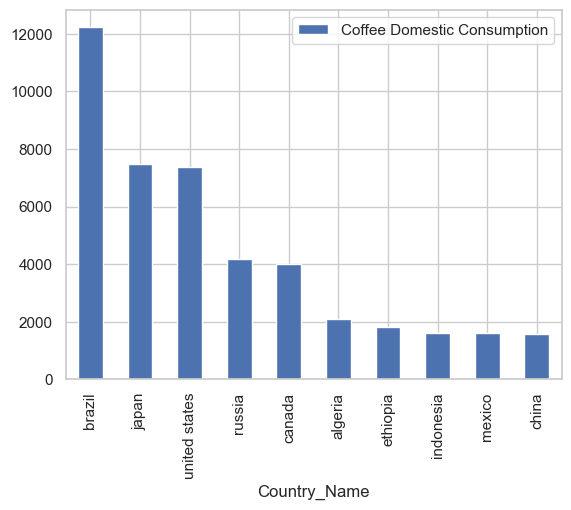

In [511]:
# Show the top 10 countries with the highest coffee consumption
# Show a bar graph
dfMergedHappiness.sort_values('Coffee Domestic Consumption', ascending=False).head(10).plot(x='Country_Name', y='Coffee Domestic Consumption', kind='bar')



Este consumo representa, o consumo do que generelasticamente considerariamos como consumo de café (bicas, café soluvel, café de supermercado,etc) mas neste dado também aparece consumo de café para industria, como torrefações. Ora é normal que o Brazil apareça destacadissimo pois é o maior produtor do mundo, conhecidamente.
Uma vez mais, a limitação do dataset ao não nos deixar ver em detalhe os paises Europeus torna-se frustrante. Seria interessante analisar Portugal e o impacto de industrias como a Delta, Camelo entre outras.

Vamos olhar então para a coluna "Soluble Dom. Cons" a ver se nos dá os dados que queremos

In [512]:
# Show the top 10 countries with the highest coffee consumption
# Show a bar graph
dfCoffee_grouped = dfCoffee[dfCoffee['Attribute_Description'] == 'Soluble Dom. Cons'].groupby('Country_Name').sum()
dfCoffee_avg = dfCoffee.groupby(['Country_Name', 'Attribute_Description'])['Value'].mean().reset_index()
dfCoffee_filtered = dfCoffee_avg[dfCoffee_avg['Attribute_Description'] == 'Soluble Dom. Cons']
#Change the column named Value to Coffee Domestic Consumption
dfCoffee_filtered.rename(columns={'Value': 'Soluble Dom. Cons'}, inplace=True)
dfCoffee_filtered.head()
#dfCoffee_filtered.sort_values('Soluble Dom. Cons', ascending=False).head(10).plot(x='Country_Name', y='Soluble Dom. Cons', kind='bar')


/var/folders/2r/hg99w_993sncksr33jq7mb_w0000gn/T/ipykernel_3556/770640775.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoffee_filtered.rename(columns={'Value': 'Soluble Dom. Cons'}, inplace=True)


,Country_Name,Attribute_Description,Soluble Dom. Cons


### Ainda top 10.. mas para a Europa

(Aqui consegue-se vêr a limitação do dataset que não contem nenhum pais pertencente à EU)

<Axes: xlabel='Country_Name'>

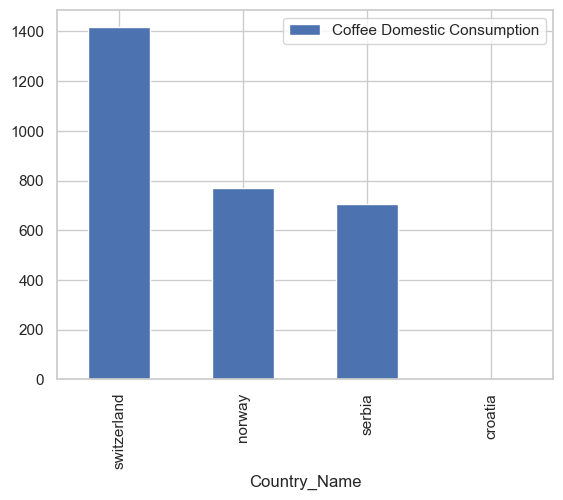

In [513]:
# Show the top 10 countries with the highest coffee consumption where Region is like "EUROPE"
# Show a bar graph
dfMergedHappiness[dfMergedHappiness['Region'].str.contains('EUROPE', case=False)].sort_values('Coffee Domestic Consumption', ascending=False).head(10).plot(x='Country_Name', y='Coffee Domestic Consumption', kind='bar')


Apesar de ser o Pais mais pequeno, a Suiça lidera este rank limitado. Isto suscitou curiosidade e fui encontrar este artigo: 
https://www.cbi.eu/market-information/coffee/switzerland/market-potential
Pelo que pude analisar, é assim pois tem uma industria relativamente grande de produção de produtos derivados de café. Fica assim explicada esta liderança.

### Plot
Para este tipo de dados é o que faz mais sentido.
Neste é visivel que não existe relação entre o consumo de café e a felicidade! Este era um dos principais objectivos deste trabalho, responder a esta pergunta. Atrás também já tinhamos visto que este consumo doméstico não é propriamente o que quereriamos para fazer esta analise. Precisavamos de um numero de café "vendido internamente", separado por café soluvel, grão entre outras caracteristicas.

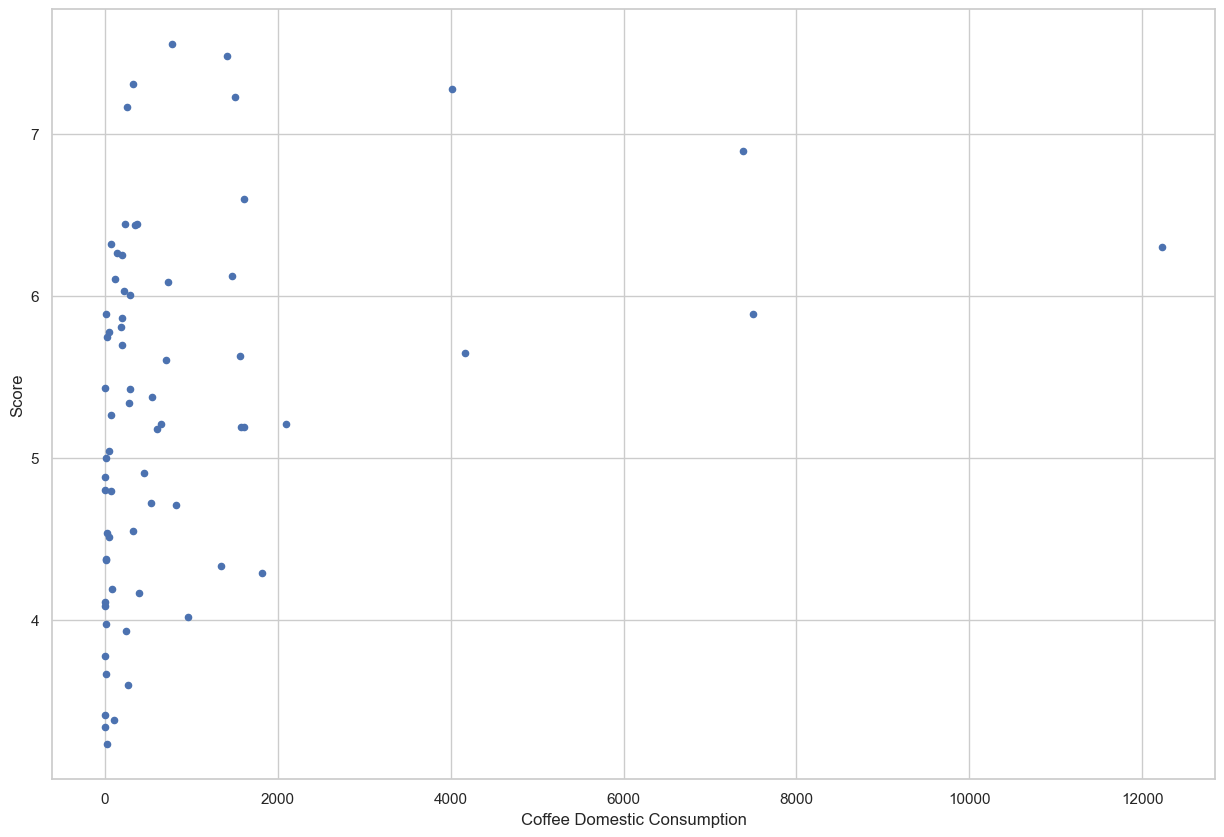

In [514]:
import matplotlib.pyplot as plt
#Compare with a plotter graph both the coffe consumption and the happiness score
dfMergedHappiness.plot(x='Coffee Domestic Consumption', y='Score', kind='scatter', figsize=(15, 10))
plt.show()

Mas e se conseguir o consumo de café

### "Brincar" com os dados

Quando se "brinca" com dados, podem aparecer padrões que nunca esperariamos encontrar. É portanto importante que, quando se investiga possiveis correlações entre dados, que não se façam apenas aquelas que parecem "lógicas" mas também outras que podem parecer menos apropriadas. Procura-se portanto, padrões. Nos dias que correm, tecnologias como IA- Machine Learning, permitem fazer este tipo de associações com maior facilidade. Não é tema deste trabalho e fica apenas como nota.

### Per capita
Vamos criar uma coluna de consumo per-capita.
Aqui pode-se ver que, se se analisar per capita, o grafico tente mais para a direita mas continua sem se poder vêr uma relação direta.

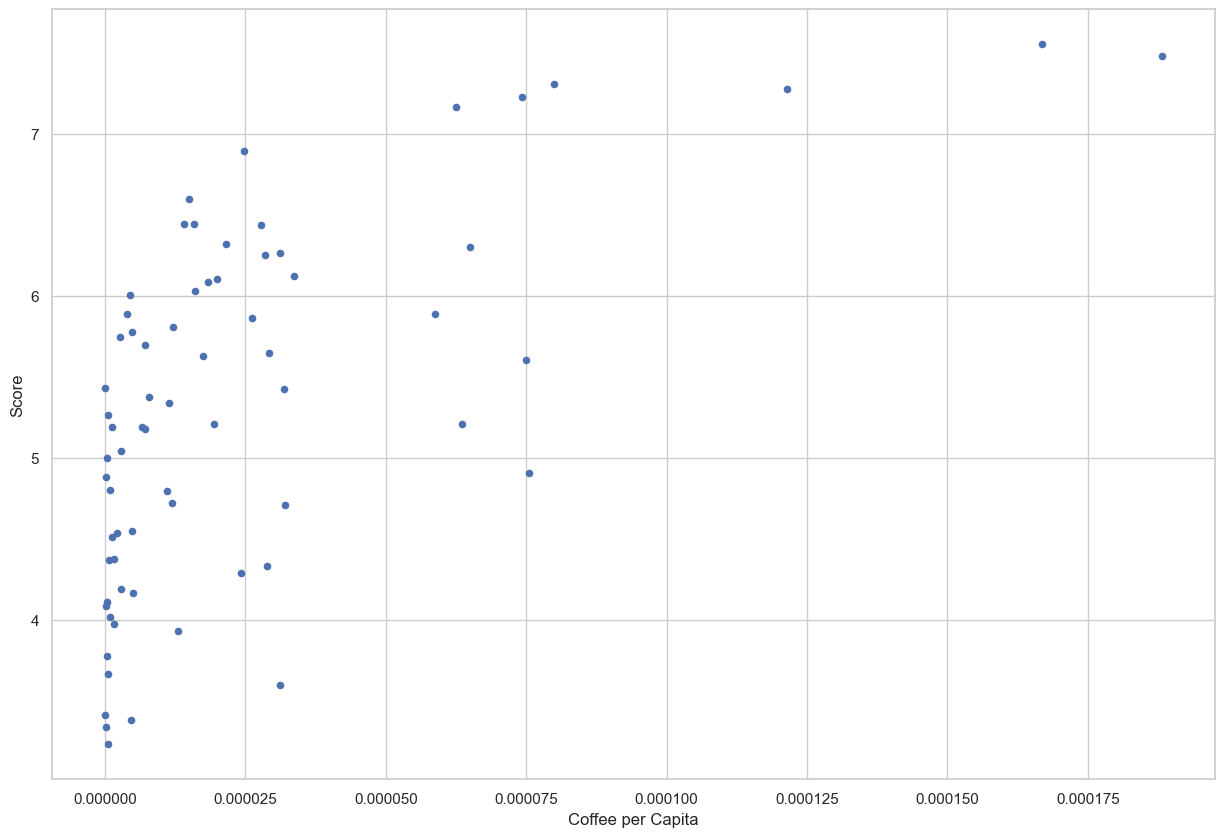

In [515]:
#Create a new column named coffee per capita based on the coffee consumption and the population
dfMergedHappiness['Coffee per Capita'] = dfMergedHappiness['Coffee Domestic Consumption'] / dfMergedHappiness['Population']
#Plot the happiness score against the coffee per capita
dfMergedHappiness.plot(x='Coffee per Capita', y='Score', kind='scatter', figsize=(15, 10))
plt.show()

### Verificar se a àrea tem influencia

In [516]:
#Save the file
dfMergedHappiness.to_csv('DadosTratados/AllMerged.csv', index=False)


In [517]:
# Show a new graph with the consumption vs the area but first convert the area to square meters from square miles
dfMergedHappiness['Area (sq. mi.)'] = pd.to_numeric(dfMergedHappiness['Area (sq. mi.)'], errors='coerce') * 2.58999

# Rename the column to Area (sq. km.)
dfMergedHappiness.rename(columns={'Area (sq. mi.)': 'Area (km2)'}, inplace=True)
dfMergedHappiness['Coffee per Area'] = dfMergedHappiness['Coffee Domestic Consumption'] / dfMergedHappiness['Area (km2)']


### Analise via gráfico de barras

Nesta análise, o que salta à vista são os paises mais pequenos. Isto é espectável pois paises pequenos que tenham consumos "elevados" vão-se destacar. Podemos também ver que a densidade populacional está presente. Singapura, que é de longe o Pais com maior densidade para a àrea que tem, destaca-se neste gráfico.

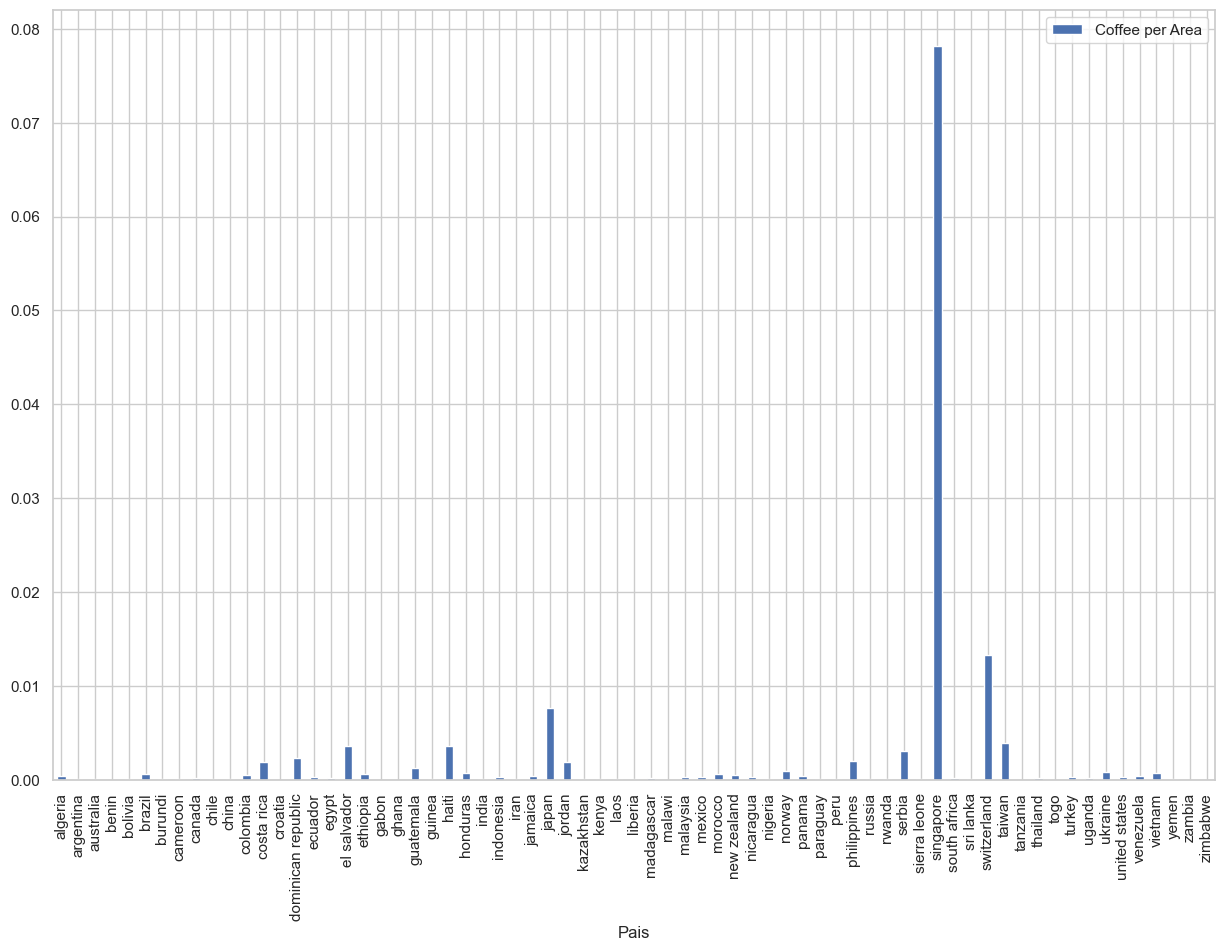

In [518]:

# Show a bar graph with the coffee consumption per area
dfMergedHappiness.plot(x='Country_Name', y='Coffee per Area', kind='bar', figsize=(15, 10))
# Rename x-axis label
plt.xlabel('Pais')
plt.show()
